<a href="https://colab.research.google.com/github/taylorec/Data-Science-with-Python/blob/main/MedicalCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
medi=pd.read_csv('drive/MyDrive/datasets/Medical cost.csv')
medi.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# bmi: Body mass index (kg / m ^ 2)

In [8]:
# This project attempts to accurately predict insurance costs

In [9]:
medi.shape

(1338, 7)

In [10]:
medi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
medi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='charges'>

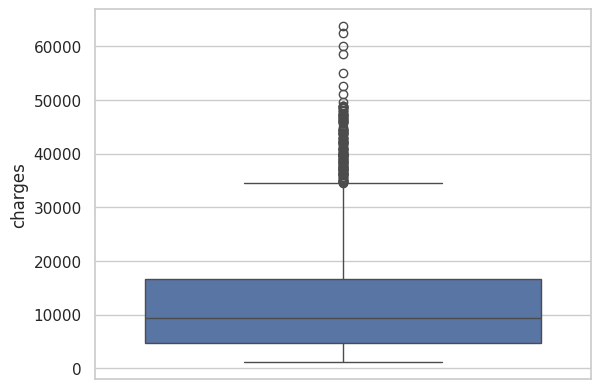

In [12]:
# Boxplot of charges

sns.set_theme(style="whitegrid")
sns.boxplot(medi['charges'])

<Axes: ylabel='bmi'>

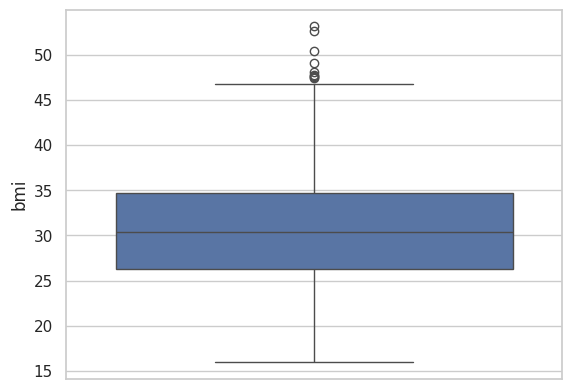

In [13]:
# Boxplot of BMI - outliers are >46

sns.boxplot(medi['bmi'])

In [14]:
medi[['sex','age']].groupby('sex').agg(['mean','count'])

age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

In [15]:
medi['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [16]:
medi[['sex','children']].groupby('sex').agg(['mean'])

,children
,mean
sex,
female,1.074018
male,1.115385


<Axes: xlabel='age', ylabel='bmi'>

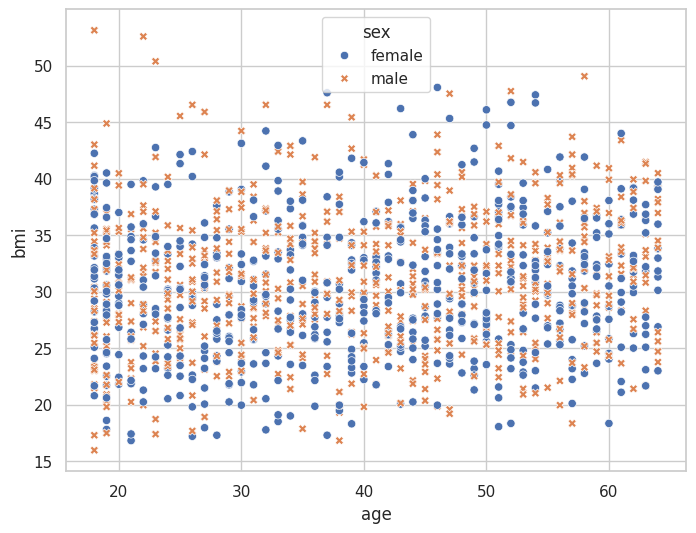

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=medi, x="age", y="bmi", hue="sex", style="sex")

<Axes: xlabel='age', ylabel='charges'>

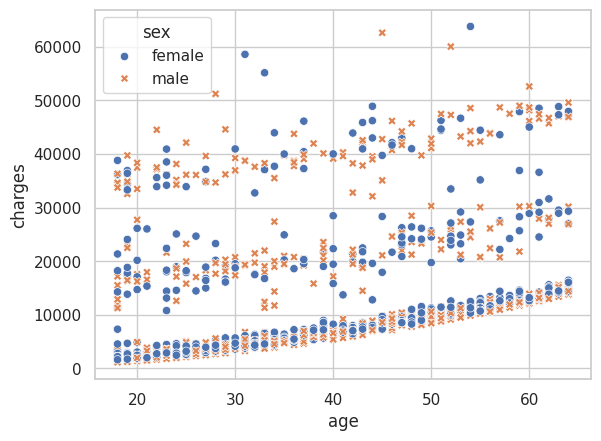

In [18]:
sns.scatterplot(data=medi, x="age", y="charges", hue="sex", style="sex")

<Axes: xlabel='age', ylabel='charges'>

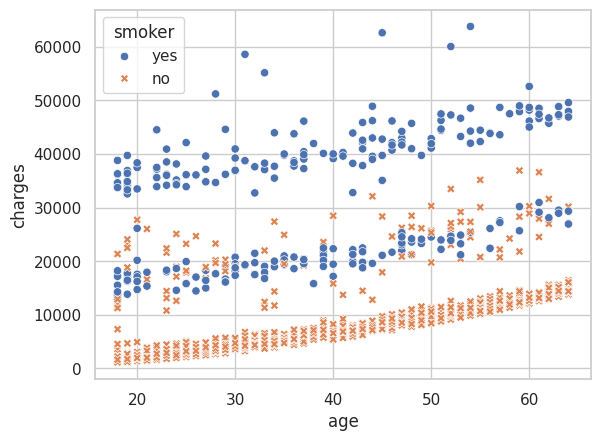

In [19]:
sns.scatterplot(data=medi, x="age", y="charges", hue="smoker", style="smoker")

In [20]:
# removing outlier values:

medi = medi[medi['bmi'] < 47]

medi.shape

(1329, 7)

In [21]:
# Finding categorical data:

medi['smoker'].value_counts()

smoker
no     1058
yes     271
Name: count, dtype: int64

In [22]:
medi['region'].value_counts()

region
southeast    357
northwest    325
southwest    324
northeast    323
Name: count, dtype: int64

In [23]:
medi['sex'].value_counts()

sex
male      670
female    659
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [25]:
name_list = ['sex', 'smoker', 'region']

for name in name_list:
  medi[name] = label_encoded(medi[name])

medi.head(3)

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


<Axes: >

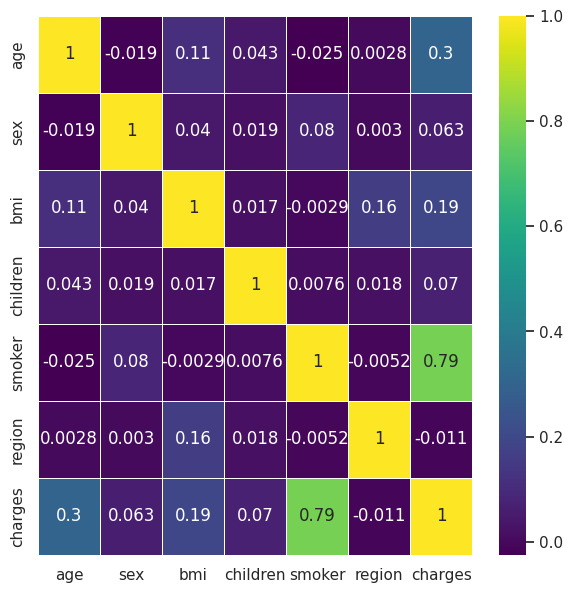

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(medi.corr(),annot=True,cmap='viridis',linewidths=.5)

### Medical Cost Prediction Model

In [27]:
y = medi['charges']
X = medi.drop(['charges'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [30]:
random_model = RandomForestRegressor(n_estimators=250, n_jobs = -1)

In [31]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Check the training accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

97.64 %


In [32]:
#Check the testing accuracy
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

83.11 %
